# Basit Doğrusal Regresyon - Model Tuning - Model Doğrulama

### Bir mağaza sahibi, mağazasındaki ürünlerin satışlarının hava durumu koşullarına bağlı olup olmadığını anlamak istiyor. Mağaza sahibi, 30 gün boyunca günlük satışları ve o günkü hava durumu (sıcaklık) verilerini topladı. Şimdi, bu verileri kullanarak, mağazasındaki ürünlerin satışlarını tahmin etmek için bir doğrusal regresyon modeli oluşturmak istiyor.

In [330]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

In [315]:
# veri setini oluşturalım.

np.random.seed(42) # rastgele değişkenlerin tekrar üretilmesini sağlar.
temperature = np.random.normal(25, 5, 30) # Sıcaklık
sales = 50 + (temperature * 3) + np.random.normal(0, 10, 30) # satışlar

data = pd.DataFrame({'temperature': temperature, 'sales': sales})
data.head()

,temperature,sales
0,27.483571,126.433646
1,24.308678,141.448817
2,28.238443,134.580356
3,32.615149,137.268339
4,23.829233,129.713149


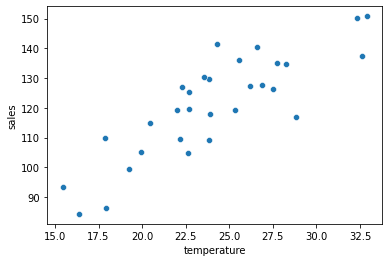

In [316]:
# veri setini görselleştirelim.
sns.scatterplot(data=data, x='temperature', y='sales');

In [317]:
data.corr()
# pozitif yönlü güçlü bir korelasyon var.

,temperature,sales
temperature,1.000000,0.841305
sales,0.841305,1.000000


In [318]:
# bağımlı ve bağımsız değişkenleri oluşturalım.

X = data[['temperature']].values.reshape(-1, 1)
y = data['sales']

In [319]:
# modeli oluşturalım ve eğitelim.

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [320]:
# model katsayılarını ve sabitini görelim.

print('Katsayılar: ', model.coef_)
print('Sabit: ', model.intercept_)

# katsayılar ve sabit terimleri, basit doğrusal regresyon formülasyonundaki terimleri ifade ediyor.
# aslında biz matematiksel bir formüldeki eksik değerleri bulmaya çalışıyoruz.

Katsayılar:  [3.20449712]
Sabit:  43.8683248161816


In [321]:
# tahmin
y_pred = model.predict(X)

In [322]:
# R-kare değeri
r2 = r2_score(y, y_pred)
print('R-kare değeri: ', r2)

R-kare değeri:  0.7077947836737009


#### Bu R-kare değeri, modelimizin sıcaklık değişkeni ile satışlar arasındaki ilişkiyi açıklama oranının %82 olduğunu göstermektedir.

#### Şimdi, modelimizi daha da geliştirmek için, veri setimizi eğitim ve test setlerine ayırabilir ve eğitim seti üzerinde modelimizi eğitebiliriz.

# Model Tuning İşlemi

In [329]:
random_states = [0, 20, 42, 60, 100]

for element in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=element)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    print(f'{element} random_state değeri için R-kare değeri: {r2}')

0 random_state değeri için R-kare değeri: 0.7619181761691214
20 random_state değeri için R-kare değeri: 0.318188592161765
42 random_state değeri için R-kare değeri: 0.6640771582152317
60 random_state değeri için R-kare değeri: 0.7695161013155506
100 random_state değeri için R-kare değeri: 0.8446288291182518


#### En iyi performansı random_state=100 parametresinde alıyoruz. Bu yüzden modelimizi bu parametreye göre düzenleyelim.

In [332]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R-kare değeri: ', r2)

R-kare değeri:  0.8446288291182518


# Model Doğrulama İşlemi

#### Son olarak, modelimizin performansını daha da doğrulamak için, k-fold çapraz doğrulama yöntemini kullanabiliriz. Bu yöntem, veri setini k parçaya böler, her seferinde bir parçayı test seti olarak kullanır ve kalan parçaları eğitim seti olarak kullanır. Bu işlemi k defa tekrarlar ve her bir tekrar için modelin performansını ölçer.

In [333]:
# 5-fold çapraz doğrulama kullanarak modelin performansını ölçelim.
cv_scores = cross_val_score(model, X, y, cv=5)

print('CV R-kare değerleri: ', cv_scores)
print('CV R-kare ortalaması: ', np.mean(cv_scores))

CV R-kare değerleri:  [-0.24486717  0.47560062  0.79138073  0.81359899  0.37753051]
CV R-kare ortalaması:  0.4426487392795587


#### Bu sonuçlar, modelimizin çapraz doğrulama ile doğrulanmış bir şekilde sıcaklık değişkeni ile satışlar arasındaki ilişkiyi açıklıyor. Modelimizin ortalama R-kare değeri %44 'dür ve k-fold çapraz doğrulama ile test edildiğinde, modelimizin genel olarak ortalamanın altında performans sergilediği söylenebilir. Bu oranı yükseltebilmek için veri setine yeni bağımsız değişkenler eklenebilir. 